Módelo depredador-presa revisitado
============================

Recordemos el módelo depredador-presa que analizamos al comienzo del curso (antes de entrar en modo cuarentena). 

Recordemos que $R(t)$ denota la población (en miles, o millones, o en cualquier otro múltiplo de la unidad) de presas presentes en el tiempo $t$ y que $F(t)$ denota la población de depredadores. Supondremos que tanto $R(t)$ como $F(t)$ son positivos. Un ejemplo de módelo que podría gobernar los cambios en la población de esas dos especies es

$$\frac{dR}{dt} = 2R - 1.2RF$$
$$\frac{dF}{dt} = -F + 0.9RF$$

El término $2R$ en la ecuación para $dR/dt$ representa la tasa de crecimiento exponencial de la presa en ausencia de depradores, y el término $-1.2RF$ corresponde el efecto negativo sobre la presa por la interacción de ambas especies. La expresión $-F$ en $dF/dt$ corresponde a la hipótesis de que los depredadores mueren si no hay presa que comer, y que $0.9RF$ es el efecto positivo sobre los depredadores por la misma interacción. 

Los coeficientes $2$,$-1.2$,$-1$ y $0.9$ dependen de la especie implicada (Y normalmente se estiman usando datos) y son solo a modo de ejemplo. 

La presencia de los términos $RF$ en estas ecuaciones dificulta resolver este sistema. Es **imposible** obtener fórmulas explícitas para la solución general, pero existen algunas condiciones inciales que conducen a resultados simples. 

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def depPresa(X,t=0):
    R,F = X
    dR = 2*R-1.2*F*R
    dF = -F+0.9*R*F
    return dR,dF

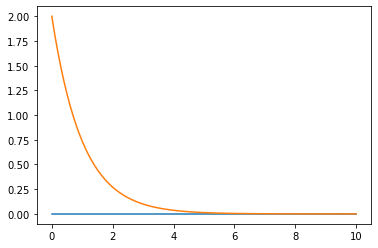

In [3]:
t = np.linspace(0,10,100)
Y = odeint(depPresa,[0,2],t)
plt.plot(t,Y[:,0],t,Y[:,1])


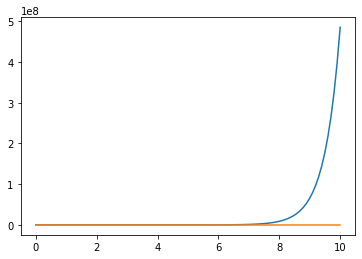

In [4]:
Y = odeint(depPresa,[1,0],t)
plt.plot(t,Y[:,0],t,Y[:,1])


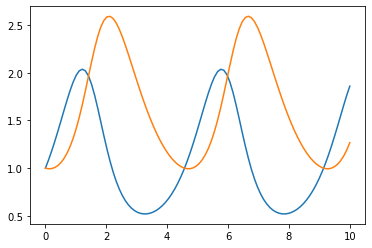

In [5]:
Y = odeint(depPresa,[1,1],t)
plt.plot(t,Y[:,0],t,Y[:,1])

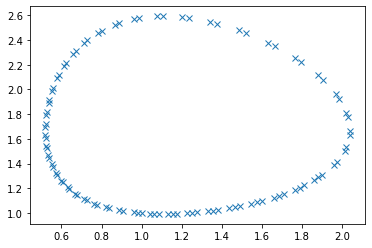

In [6]:
plt.plot(Y[:,0],Y[:,1],"x")

Puntos de Equilibrio
-----------------------------
En el caso del sistema anterior, diremos que es **autonómo** puesto que los lados derechos de las ecuaciones **NO DEPENDEN** explícitamente de $t$. Entonces podemos definir puntos de equilibrio como aquellos puntos $(R,F)$ tales que sean soluciones de $dR/dt=0$ y $dF/dt=0$. En el ejemplo anterior, tenemos 

$$0 = \frac{dR}{dt} = (2-1.2F)R$$
$$0 = \frac{dF}{dt} = (-1+0.9R)F$$ 

De la primera ecuación se deduce que $2=1.2F$ o $R=0$ y de la segunda ecuación se deduce que $1=0.9R$ o $F=0$. Analizando concluimos que hay dos puntos de equilibrio: 
$$(R,F)=(0,0)$$
$$(R,F)=(1/0.9,2/1.2)$$.


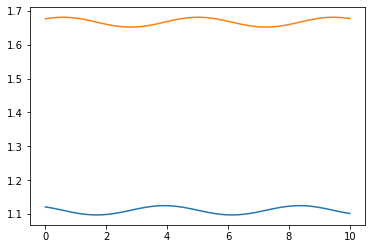

In [7]:
Y = odeint(depPresa,[1/0.9+0.01,2/1.2+0.01],t)
plt.plot(t,Y[:,0],t,Y[:,1])

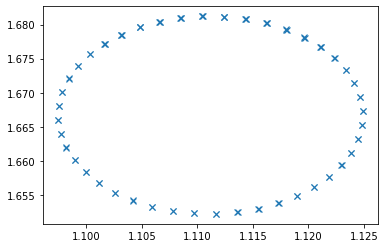

In [8]:
plt.plot(Y[:,0],Y[:,1],"x")

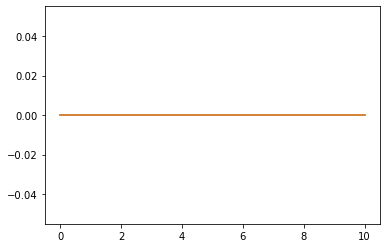

In [9]:
Y = odeint(depPresa,[0,0],t)
plt.plot(t,Y[:,0],t,Y[:,1])

Modelo depredador-presa modificado
-----------------------------------------------------

En la primera parte del curso vimos como el módelo exponencial no era necesariamente un buen modelo de población y el módelo logístico se ajustaba mejor a la realidad. Entonces, modificaremos el modelo depredador-presa para que las poblaciones de ambas especies tengan una capacidad de carga. Un ejemplo de este modelo es el siguiente: 
$$\frac{dR}{dt} = 2R(1-\frac{R}{2})-1.2RF$$
$$\frac{dF}{dt} = -F + 0.9RF$$
Aquí cuando no hay depredadores ($F=0$) tenemos que el módelo para $R$ se comporta como un módelo logístico con capcidad de soporte $2$. 

Encontremos los puntos de equilibrios de este modelo. 
Primero, la segunda ecuacion nos dice que $R=1/0.9$ o $F=0$. La primera ecuación en cambio nos dice que 
$$0 = 2R(1-\frac{R}{2})-1.2RF$$
Resolvamos esta primera ecuación: Factorizando por $R$
$$0 = R(2-R-1.2F)$$ 
de donde se tiene $R=0$ o $2=R+1.2F$. Si $F\neq0$ y $R\neq0$, entonces $R=1/0.9$ y reemplazando en la última ecuación obtenemos
$$2 = 1/0.9+1.2F$$ y despejando $F$
$$F = (2 - 1/0.9)/1.2 = \frac{\frac{18-10}{9}}{\frac{12}{10}} =  \frac{\frac{8}{9}}{\frac{12}{10}}=\frac{8}{9}\cdot \frac{10}{12}=20/27$$

Concluimos entonces que hay tres puntos de equilibrio:
$(R,F)=(0,0)$, $(R,F)=(2,0)$ y $(R,F)=(1/0.9,20/27)$


In [10]:
def depPresaMod(X,t=0):
    R,F = X
    dR = 2*R*(1-R/2)-1.2*R*F
    dF = -F + 0.9*R*F
    return dR,dF

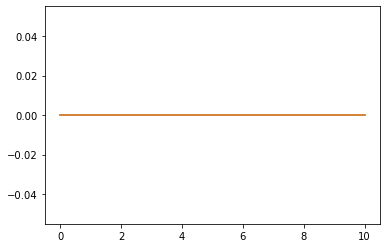

In [11]:
Y = odeint(depPresaMod,[0,0],t)
plt.plot(t,Y[:,0],t,Y[:,1])

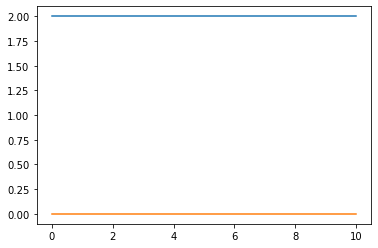

In [12]:
Y = odeint(depPresaMod,[2,0],t)
plt.plot(t,Y[:,0],t,Y[:,1])

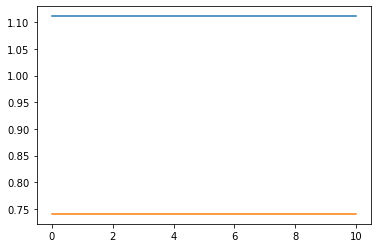

In [13]:
Y0 = odeint(depPresaMod,[1/0.9,20/27],t)
plt.plot(t,Y0[:,0],t,Y0[:,1])

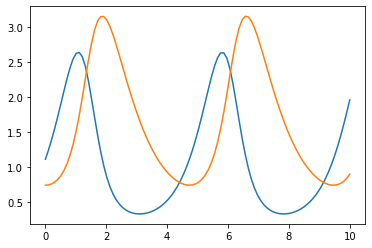

In [14]:
Y1 = odeint(depPresa,[1/0.9,20/27],t)
plt.plot(t,Y1[:,0],t,Y1[:,1])

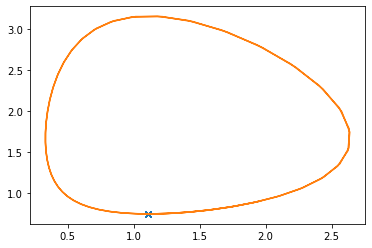

In [15]:
plt.plot(Y0[:,0],Y0[:,1],'x',Y1[:,0],Y1[:,1])

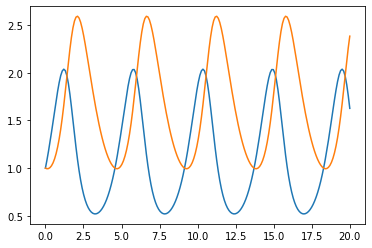

In [16]:
y0=[1,1]
t=np.linspace(0,20,200)
Y0 = odeint(depPresa,y0,t)
Y1 = odeint(depPresaMod,y0,t)

plt.plot(t,Y0[:,0],t,Y0[:,1])

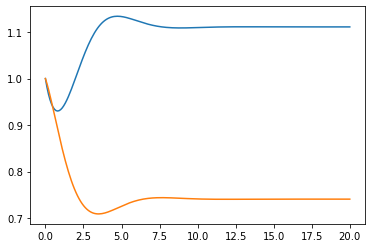

In [17]:
plt.plot(t,Y1[:,0],t,Y1[:,1])

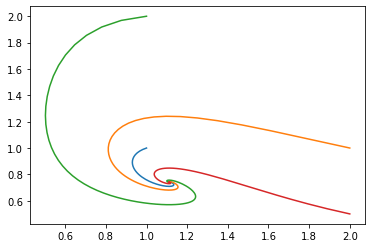

In [18]:
y0=np.array([1,1])
t=np.linspace(0,20,200)
Y1 = odeint(depPresaMod,[1,1],t)
Y2 = odeint(depPresaMod,[2,1],t)
Y3 = odeint(depPresaMod,[1,2],t)
Y4 = odeint(depPresaMod,[2,0.5],t)


#plt.plot(t,Y0[:,0],t,Y0[:,1])
plt.plot(Y1[:,0],Y1[:,1])
plt.plot(Y2[:,0],Y2[:,1])
plt.plot(Y3[:,0],Y3[:,1])
plt.plot(Y4[:,0],Y4[:,1])



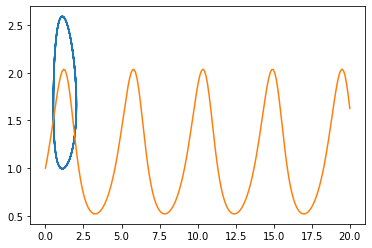

In [19]:
plt.plot(Y0[:,0],Y0[:,1])
plt.plot(t,Y0[:,0])

Ejercicio 7:
-----------

Sistema de depredador-presa

$$\frac{dR}{dt} = 2(1-R/3)R-RF$$
$$\frac{dF}{dt} = -2F + 4RF$$

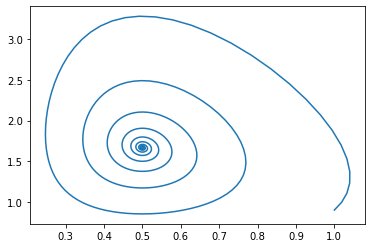

In [20]:
def depPresaEjer7(X,t=0):
    R,F = X
    dR = 2*R*(1-R/3)-R*F
    dF = -2*F + 4*R*F
    return dR,dF
y0=np.array([1,1])
t=np.linspace(0,100,2000)
Y1 = odeint(depPresaEjer7,[1,0.9],t)
plt.plot(Y1[:,0],Y1[:,1])

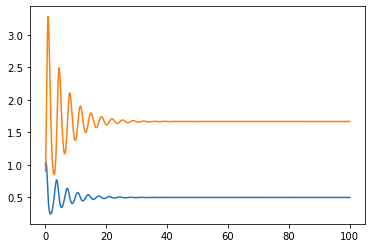

In [21]:
plt.plot(t,Y1[:,0],t,Y1[:,1])

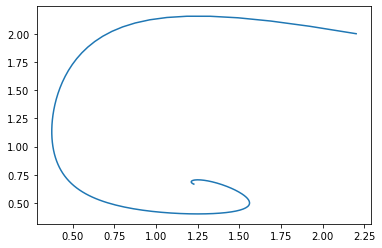

In [22]:
def depPresaEjer8(X,t=0):
    R,F = X
    dR = 2*R*(1-R/2.5)-1.5*R*F
    dF = -F + 0.8*R*F
    return dR,dF
y0=np.array([1,1])
t=np.linspace(0,10,200)
Y1 = odeint(depPresaEjer8,[2.2,2],t)
plt.plot(Y1[:,0],Y1[:,1])

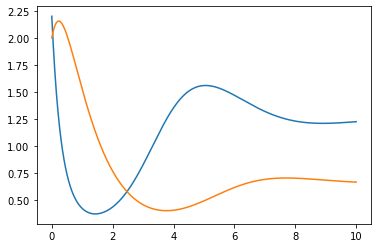

In [23]:
plt.plot(t,Y1[:,0],t,Y1[:,1])

Ejercicios 1-6 Libro Blanchard. Tarea Lunes 8. Pagina 152 y 153 (de los números impresos en el libro, capitulo 2.1)
Proxima clase resolveremos ejercicios 9-14. Venir preparados

Clase 8 Junio
===========

Campos Vectoriales
----------------------------



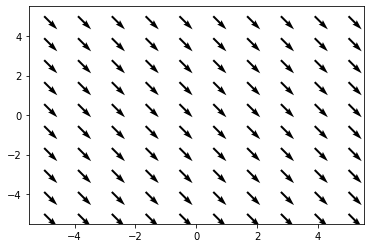

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = 1
v = -1

plt.quiver(x,y,u,v)
plt.show()


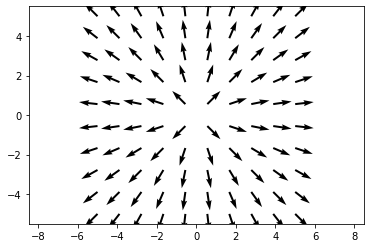

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = x/np.sqrt(x**2 + y**2)
v = y/np.sqrt(x**2 + y**2)
plt.axis('equal')
plt.quiver(x,y,u,v)
plt.show()


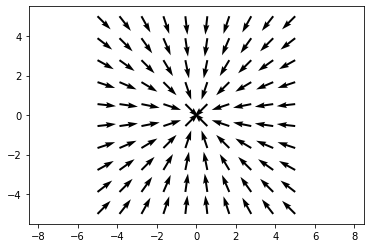

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = -x/np.sqrt(x**2 + y**2)
v = -y/np.sqrt(x**2 + y**2)
plt.axis('equal')
plt.quiver(x,y,u,v)
plt.show()

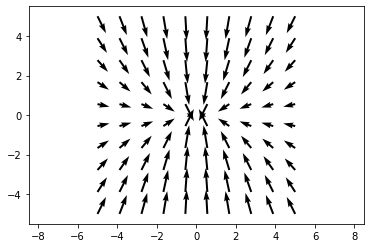

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = -x/np.sqrt(x**2 + y**2)
v = -2*y/np.sqrt(x**2 + y**2)
plt.axis('equal')
plt.quiver(x,y,u,v)
plt.show()

(0.6805471950534674, 7.708508903877183, 1.3610943901069348, 15.417017807754366)

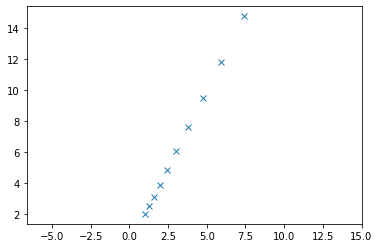

In [28]:
t = np.linspace(0,2,10)
plt.plot(np.exp(t),2*np.exp(t),'x')
plt.axis('equal')

In [29]:
pltdef sist(X,t=0):
    dX = X
    return dX
t = np.linspace(0,10,100)
Y = odeint(sist,[-4,-2],t)
plt.plot(Y[:,0],Y[:,1],'x')
plt.axis('equal')

SyntaxError: invalid syntax (<ipython-input-29-457ca26c0492>, line 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = -y/np.sqrt(x**2 + y**2)
v = x/np.sqrt(x**2 + y**2)

plt.quiver(x,y,u,v)
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, color = 'black')

plt.show()

In [ ]:
def depPresa(X,t=0):
    R,F = X
    dR = 2*R-1.2*F*R
    dF = -F+0.9*R*F
    return dR,dF

R,F = np.meshgrid(np.linspace(-1,1,21),np.linspace(-1,1,21))
u=dR = 2*R-1.2*F*R
v=dF = -F+0.9*R*F

#u = dR/np.sqrt(dR**2 + dF**2)
#v = dF/np.sqrt(dR**2 + dF**2)
plt.figure(figsize=(20,20))
plt.quiver(R,F,u,v)
plt.axis('equal')
plt.show()


Modelo para dos especies en competencia
---------------------------------------

$$\frac{dx}{dt} = 2x(1-\frac{x}{2})-xy$$
$$\frac{dy}{dt} = 3y(1-\frac{y}{3})-2xy$$

In [ ]:
def dCompetencia(X,t=0):
    x,y = X
    dx = 2*x*(1-x/2)-x*y
    dy = 3*y*(1-y/3)-2*x*y
    return (dx,dy)

In [ ]:
X,Y = np.meshgrid(np.linspace(-1,2,21),np.linspace(-1,2,21))
u = dX = 2*X*(1-X/2)-X*Y
v = dY = 3*Y*(1-Y/3)-2*X*Y
   
u = dX/np.sqrt(dX**2 + dY**2)
v = dY/np.sqrt(dX**2 + dY**2)
plt.figure(figsize=(20,20))
plt.quiver(X,Y,u,v)
plt.axis('equal')
plt.show()


In [ ]:
X,Y = np.meshgrid(np.linspace(0.5,1.5,21),np.linspace(0.5,1.5,21))
u = dX = 2*X*(1-X/2)-X*Y
v = dY = 3*Y*(1-Y/3)-2*X*Y
   
u = dX/np.sqrt(dX**2 + dY**2)
v = dY/np.sqrt(dX**2 + dY**2)
plt.figure(figsize=(20,20))
plt.quiver(X,Y,u,v)
plt.axis('equal')
plt.show()


Clase 12 Junio
============



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))
s = x+y
u = s/np.sqrt(2*s**2)
v = s/np.sqrt(2*s**2)
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.show()


<ipython-input-47-c8ca0f80dc2e>:9: RuntimeWarning: invalid value encountered in true_divide
  u = s/l
<ipython-input-47-c8ca0f80dc2e>:10: RuntimeWarning: invalid value encountered in true_divide
  v = w/l


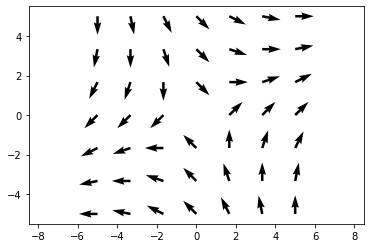

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,7),np.linspace(-5,5,7))
s = x+y
w = x - y
l = np.sqrt(s**2+w**2)
u = s/l
v = w/l
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.show()

Clase 15 Junio
--------------

$$\frac{dx}{dt}=ax+by$$
$$\frac{dy}{dt}={cx}+dy$$

se transforma en 

$$\frac{dX}{dt} = AX$$
donde $$A = \begin{pmatrix}a&b\\c&d\end{pmatrix}$$
y $$X=\begin{pmatrix}x\\y\end{pmatrix}$$

Puntos de equilibrio
----------------------------

Si un sistema es $\frac{dX}{dt}=AX$, entonces $X=\begin{pmatrix}0\\0\end{pmatrix}$
si y solo si 

$$\det(A) = ad-bc \neq 0$$

Ejemplo 1:
$$A = \begin{pmatrix}1&1\\1&1\end{pmatrix}$$

$$\frac{dx}{dt}=x+y$$
$$\frac{dy}{dt}=x+y$$

<ipython-input-33-5800cad3bd9e>:8: RuntimeWarning: invalid value encountered in true_divide
  u = s/np.sqrt(Integer(2)*s**Integer(2))
<ipython-input-33-5800cad3bd9e>:9: RuntimeWarning: invalid value encountered in true_divide
  v = s/np.sqrt(Integer(2)*s**Integer(2))


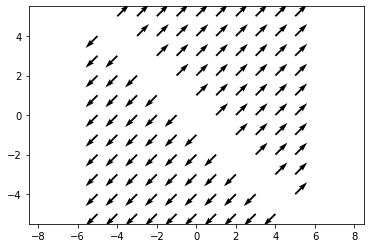

In [33]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,11),np.linspace(-5,5,11))
s = x+y
u = s/np.sqrt(2*s**2)
v = s/np.sqrt(2*s**2)
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.show()


Ejemplo 2:
$$\frac{dX}{dt}=AX$$
con 
$$A = \begin{pmatrix}1&0\\0&-2\end{pmatrix}$$

$$\frac{dx}{dt} = x$$
$$\frac{dy}{dt} = - 2y$$

In [36]:
A = Matrix([[1,0],[0,-2]])
A.determinant()

-2

<ipython-input-39-6e04801a4838>:6: RuntimeWarning: invalid value encountered in true_divide
  u = x/np.sqrt(x**Integer(2)+(-Integer(2)*y)**Integer(2))
<ipython-input-39-6e04801a4838>:7: RuntimeWarning: invalid value encountered in true_divide
  v = -Integer(2)*y/np.sqrt(x**Integer(2)+(-Integer(2)*y)**Integer(2))


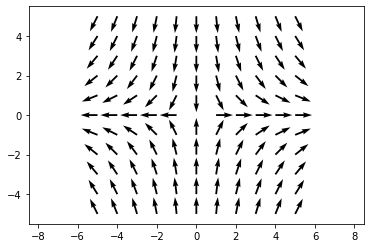

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,11),np.linspace(-5,5,11))
u = x/np.sqrt(x**2+(-2*y)**2)
v = -2*y/np.sqrt(x**2+(-2*y)**2)
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.show()


<ipython-input-41-21146101b939>:6: RuntimeWarning: invalid value encountered in true_divide
  u = -x/np.sqrt(x**Integer(2)+(-Integer(2)*y)**Integer(2))
<ipython-input-41-21146101b939>:7: RuntimeWarning: invalid value encountered in true_divide
  v = -Integer(2)*y/np.sqrt(x**Integer(2)+(-Integer(2)*y)**Integer(2))


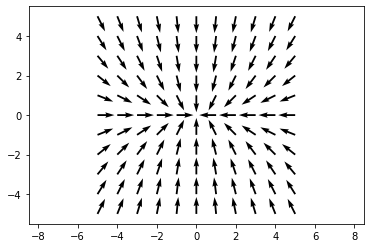

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,11),np.linspace(-5,5,11))
u = -x/np.sqrt(x**2+(-2*y)**2)
v = -2*y/np.sqrt(x**2+(-2*y)**2)
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.show()

$$\frac{dx}{dt}=-x$$
$$\frac{dy}{dt}=-2y$$

<ipython-input-48-304e18353dca>:6: RuntimeWarning: invalid value encountered in true_divide
  u = (x+y)/np.sqrt((x+y)**Integer(2)+(-x+y)**Integer(2))
<ipython-input-48-304e18353dca>:7: RuntimeWarning: invalid value encountered in true_divide
  v = (-x+y)/np.sqrt((x+y)**Integer(2)+(-x+y)**Integer(2))


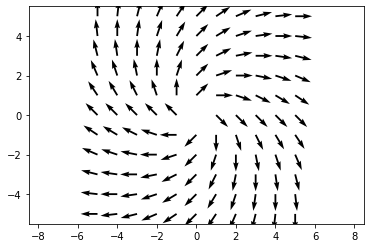

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,11),np.linspace(-5,5,11))
u = (x+y)/np.sqrt((x+y)**2+(-x+y)**2)
v = (-x+y)/np.sqrt((x+y)**2+(-x+y)**2)
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.show()

In [53]:
A = Matrix(QQ,[[1,1],[1,-1]])


In [2]:
import jupyter_manim


In [3]:
%%manim Shapes
from manimlib.scene.scene import Scene
from manimlib.mobject.geometry import Circle
from manimlib.animation.creation import ShowCreation

class Shapes(Scene):

    def construct(self):
        circle = Circle()
        self.play(ShowCreation(circle))